# Predicting Alzheimer's Disease from ADNI Data
Charles R . Tucker

## Introduction

#### The Problem: Alzheimer's Disease
> "Worldwide, 50 million people are living with Alzheimer's and other dementias." [alz.org](alz.org)

Alzheimer’s disease is a particular form of dementia that is eventually terminal and has specific pathology within the brain. Both conditions have similar symptoms at onset, though Alzheimer's disease is ultimately fatal.

Alzheimer’s disease is the most expensive disease in America according to the Alzheimer’s Association (alz.org). Caring for someone with Alzheimer’s or dementia is very demanding, with the Alzheimer’s Association estimating that around 15 million family members are providing 18.2 billion hours of unpaid care. This care would have an economic value of more than \$230 billion. [alz.org](alz.org)

There are options for early treatment of Alzheimer's disease and these are most effective at staving off progression and symptoms in the very early stages of the disease. Some of these options involve little or no cost including change in diet, taking certain supplements and antioxidants, avoiding smoking/alcohol, engaging in social activities, exercising, and brain stimulation through reading/writing/puzzles or other activities. Results are much better when implemented ealier in the disease process, and according to [alzheimers.net](alzheimers.net)
> "Although the adage, 'better late than never' certainly applies, waiting for a full blown diagnosis of Alzheimer’s disease before making healthy diet and lifestyle changes, is not a very effective prevention plan."

#### The Solution: Early Identification of At-Risk Patients

This analysis seeks to provide tools that can be used to help identify at-risk patients using a dataset publicly available from the [Alzheimer's Disease Neuroimaging Initiative](http://adni.loni.usc.edu/data-samples/access-data/). There are two questions that will be addressed:
> 1. Can changes in clinical exams and brain scans be used to predict progression to Alzheimer's disease?
> 2. Can data collected during a patient's first exam be used to predict whether or not they will be diagnosed with Alzheimer's disease?

#### The Value Added from This Solution

The monetary cost of treating Alzheimer's disease is staggering, but this disease also dramatically impacts the lives of those it affects and the loved ones that are caring for afflicted individuals. As the best patient outcomes for Alzheimer's disease occur with early detection and treatment, any method that provides tools that do this has the potential to improve the lives of many people and reduce overall costs of treating the disease.

The costs of treating Alzheimer's also expand to professional care givers including hostpitals, private practitioners, and insurance companies. It would be very beneficial to these groups to have a screening process to identify the most at-risk individuals that are in need of more care.

## Methods

#### Software and Tools

All steps of this project including data import, wrangling, cleaning, analysis, visualizations, statistics, and machine learning were conducted using python programming language in IPython notebooks through Jupyter Lab. Many different standard libraries and packages were used, and a few custom modules were written to improve functionality and readability.

#### The Dataset

The data for this project was in one excel file ADNIMERGE.csv and was acquired from the Alzheimer’s Disease Neuroimaging Initiative (ADNI website). The investigators participated in the design and implementation of ADNI and/or provided data but are not involved with this project. The exact data used was part of the Tadpole Grand Challenge. A complete listing of ADNI investigators can be found at http://adni.loni.usc.edu/wp-content/uploads/how_to_apply/ADNI_Acknowledgement_List.pdf.
> Data used in the preparation of this article were obtained from the Alzheimer’s Disease Neuroimaging Initiative (ADNI) database (adni.loni.usc.edu). The ADNI was launched in 2003 as a public-private partnership, led by Principal Investigator Michael W. Weiner, MD. The primary goal of ADNI has been to test whether serial magnetic resonance imaging (MRI), positron emission tomography (PET), other biological markers, and clinical and neuropsychological assessment can be combined to measure the progression of mild cognitive impairment (MCI) and early Alzheimer’s disease (AD). For up-to-date information, see www.adni-info.org.

#### Data Preparation: Wrangling and Cleaning

The data were analyzed for missing values and outliers using visualizations and data exploration tools in python. These were standard procedures and are viewable in the `1-Data_Import_and_Clean.ipynb` and `adnidatawrangling.py` files in the capstone project folder. No spurious data was detected, though some observations were missing some data, and these patient visits with incomplete information were excluded from the analysis.

The data were further limited to only patients for which more than one exam occurred. The dates were then used to provide a final dataframe that consisted of one row for each patient. This row consisted of data for the most recent exam for each patient that was included in the data along with the data from the patient's first exam.

From this dataframe, the change in each of the tests or scans (biomarkers) was calculated and added to the dataframe. This information would be used to try and detect progression towards Alzheimer's disease during the study. The data from the first exam (baseline data) would be used to try and predict whether or not a patient was likely to develop Alheimer's disease during the study.

It was discovered that the initial baseline visit had five categories for diagnosis: cognitively normal (CN), subjective memory complaint (SMC), early mild cognitive impairment (EMCI), late mild cognitive impairment (LMCI), and Alzheimer's Disease (AD). The subsequent visits, however, only used three diagnoses of CN, MCI, or AD. For the purpose of this analysis, CN and MCI were combined into CN per definitions of SMC obtained from relevant sources. EMCI and LMCI were combined into MCI for comparisons.

### Initial Exploratory Data Analysis

In [9]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import eda
from adnidatawrangling import wrangle_adni

sns.set()

In [11]:
# import data, clean, and extract data
adni_comp, clin_data, scan_data = wrangle_adni()

In [12]:
# extract final exam data: only the last exam for each patient
final_exam = eda.get_final_exam(adni_comp)

#### Data Composition

Visualizations and standard libraries were used to examine the data, including its composition. Analysis revealed that 642 males and 528 females were represented in the cleaned data. 

In [17]:
print('Male Patients: {}'.format(final_exam.PTGENDER.value_counts()['Male']))
print('Female Patients: {}'.format(final_exam.PTGENDER.value_counts()['Female']))

Male Patients: 642
Female Patients: 528


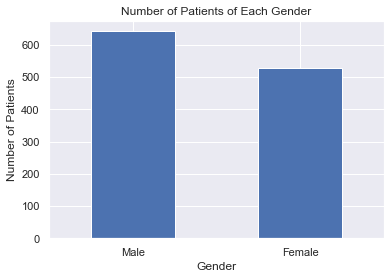

In [13]:
eda.plot_gender_counts(final_exam)

The data was analyzed to determine how many patients were in each diagnosis group. The plot below shows a bar for each of the baseline diagnosis group. The colors represent the diagnosis at the final exam. The first bar reveals that most CN patients remained that way for the duration of the study, though a few did progress to MCI and AD. The second bar shows that most of the patients intially diagnosed as MCI remained that way, though there were many that progressed to AD.

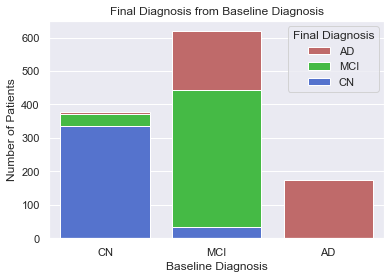

In [18]:
eda.plot_dx_change(final_exam)

#### The Biomarkers

Biographical information used from the data include age and gender.

The clinical examinations included data from multiple cognitive tests: Clinical Dementia Rating (CDRSB), Alzheimer's Disease Assessment Scale (ADAS11 and ADAS13), Mini-Mental State Exam (MMSE), and Rey's Auditory Verbal Learning Test (RAVLT immediate).

Brain scans provided the measurements for the following areas of the brain: Hippocampus, Ventricles, Whole Brain, Entorhinal cortex, and medial temporal lobe (MidTemp).

#### Performance Metrics for Machine Learning Algorithms

The ultimate goal of this analysis was to create models that could be used to identify at-risk patients for Alzheimer's disease. It is important to know the percentage of patients that developed AD that would be identified by the models, therefore, the recall on the positive class (detection rate) was used as the primary metric to evaluate model performance. 

The number of patients that are incorrectly identified as being higher risk of AD is also of interest, so 1-recall for the negative class (false positive rate) was used as another evaluation metric, though more weight was given to the detection rate.

The accuracy metric was not used, as the number of true negatives inflated this measure. Precision measures the percentage of Alzheimer's predictions that were correct, but the false positive rate was used instead because this more clearly indicates how often the model is generating incorrect predictions of Alzheimer's disease.

This strategy was chosen because the recommended use for these models is to identify patients that have a higher risk of developing Alzheimer's disease. The detection rate indicates the model's ability to catch the disease while the false positive rate shows the amount of time a person that didn't develop AD was flagged as high risk.